In [164]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family']='simhei'

df =pd.read_csv('../data/directory.csv')
df.head(2)

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object 
 9   Phone Number    18739 non-null  object 
 10  Timezone        25600 non-null  object 
 11  Longitude       25599 non-null  float64
 12  Latitude        25599 non-null  float64
dtypes: float64(2), object(11)
memory usage: 2.5+ MB


In [166]:
# 查看空值情况
df.isnull().sum()

Brand                0
Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                15
State/Province       0
Country              0
Postcode          1522
Phone Number      6861
Timezone             0
Longitude            1
Latitude             1
dtype: int64

In [167]:
def fill_na(x):
    return x

In [168]:
df['City'] = df['City'].fillna(fill_na(df['State/Province']))
df[df['Country']=='EG'].head(2)

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
5069,Starbucks,31657-104436,سان ستيفانو,Licensed,طريق الكورنيش أبراج سان ستيفانو,ALX,ALX,EG,NaN,20120800287,GMT+2:00 Africa/Cairo,29.96,31.24
5070,Starbucks,15433-161464,Cityscape,Licensed,"6 Of Octobe, El Horya Square, Giza",Cairo,C,EG,NaN,NaN,GMT+2:00 Africa/Cairo,31.35,30.13


In [169]:
# new_data.to_csv('../data/starbucks.csv',index=False,encoding='utf-8')
# print('导出成功')

In [170]:
data = pd.read_csv('../data/starbucks.csv')
data.shape

(25249, 13)

In [171]:
data.head(1)

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51


In [183]:
new_df = data.drop(['Brand','Store Number','Store Name','Street Address','Phone Number','Timezone'],axis=1)
new_df.head(2)

,Ownership Type,City,State/Province,Country,Postcode,Longitude,Latitude
0,Licensed,Andorra la Vella,7,AD,AD500,1.53,42.51
1,Licensed,Ajman,AJ,AE,NaN,55.47,25.42


In [180]:
new_df['Ownership Type'].value_counts()

Company Owned    11581
Licensed          9375
Joint Venture     3976
Franchise          317
Name: Ownership Type, dtype: int64

In [182]:
len(new_df['Timezone'].unique())

101

In [173]:
# 店铺数排名前十的国家
country_count = df['Country'] .value_counts()[0:10]
country_count

US    13608
CN     2734
CA     1468
JP     1237
KR      993
GB      901
MX      579
TW      394
TR      326
PH      298
Name: Country, dtype: int64

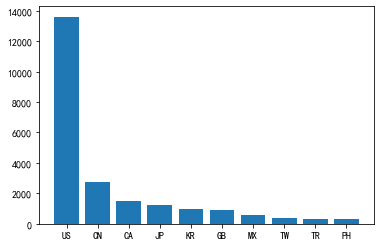

In [174]:
plt.bar(country_count.index,country_count.values)
plt.show()

In [175]:
city_count = df['City'].value_counts()[:10]
city_count

上海市            542
Seoul          243
北京市            234
New York       232
London         216
Toronto        192
Chicago        180
Mexico City    180
Seattle        156
Las Vegas      156
Name: City, dtype: int64

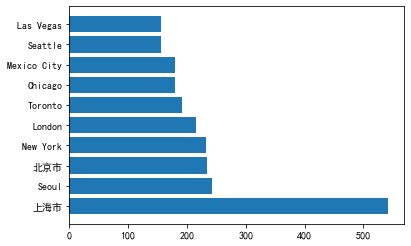

In [176]:
plt.barh(city_count.index,city_count.values)
plt.show()

In [177]:
# 中国店铺数排前十的城市

zh_city = df[df['Country']=='CN']
zh_city_count=zh_city['City'].value_counts()[:10]
zh_city_count

上海市          542
北京市          234
杭州市          117
深圳市          113
广州市          106
Hong Kong    104
成都市           98
苏州市           90
南京市           73
武汉市           67
Name: City, dtype: int64

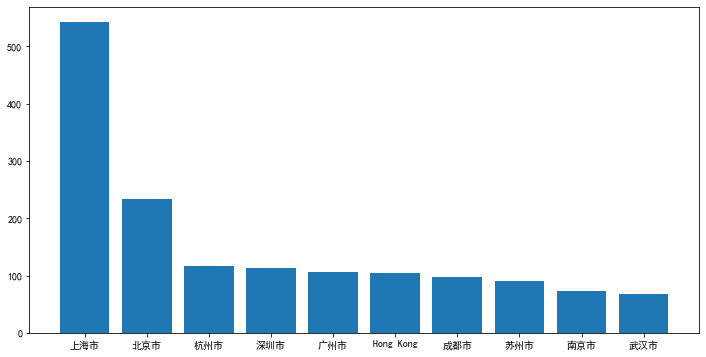

In [178]:
plt.figure(figsize=(12,6))
plt.bar(zh_city_count.index,zh_city_count.values) 
plt.show()